In [5]:
# Importing libraries
import math
import numpy as np
from scipy.special import ndtri
from numpy.linalg import solve
from numpy.linalg import cholesky
from numpy.linalg import LinAlgError
from functools import partial
from scipy import integrate
from scipy.optimize import broyden1, broyden2, newton_krylov, fixed_point, fsolve, minimize, least_squares, minimize_scalar
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import seaborn as sns

In [1]:
stupidchanger = 0

In [6]:
# Gaussian copula pdf
def _gaussian(x,y, kappa):
    R = cholesky([[1,kappa],[kappa,1]])
    x = ndtri([x,y])
    z = solve(R,x.T)
    log_det= np.sum(np.log(np.diag(R)))
    return np.exp(-0.5 * np.sum(  np.power(z,2) - np.power(x,2) ) - log_det)

In [7]:
# Calculate equilibrium sufficent statistic and varios helper functions
# Gaussian (1) or AMH (0) copula  
norm = 1
# Correlation parameter
kappa = 0.99

def acop(x,y,kappa):
    if norm == 0:
        return ( 1 + kappa * ((1+x)*(1+y)-3) + (kappa**2)*(1-x)*(1-y)) / ((1-kappa*(1-x)*(1-y))**3)
    elif norm == 1:
        return _gaussian(x,y, kappa)
    return 

def func_b(k,m):
    out, err = integrate.dblquad(lambda x,y: acop(x,y,kappa), 0,1, lambda x: np.maximum(np.minimum(m + x * k,1),0), 1)
    return out -1/2

def det_m(k):
    return least_squares(partial(func_b,k),  [0.2],  bounds=[0,0.51]).x[0]

def func_mx(k,m):
    ans1, err1 = integrate.dblquad(lambda x,y: x*acop(x,y,kappa), 0 , 1, lambda x: m + x * k,  1)
    ans0, err0 = integrate.dblquad(lambda x,y: y*acop(x,y,kappa), 0,1 , 0, lambda x: m + x * k )
    return ans0/ans1

def func_x(k):
    k = np.minimum(1,k)
    m = det_m(k)
    ans1, err1 = integrate.dblquad(lambda x,y: x*acop(x,y,kappa), 0 , 1, lambda x: m + x * k,  1)
    ans0, err0 = integrate.dblquad(lambda x,y: y*acop(x,y,kappa), 0,1 , 0, lambda x: m + x * k )
    return ans0/ans1

In [8]:
norm = 0
kappa = 0.9
#newton_krylov(lambda k: func_x(k)-k,  [0])
least_squares(lambda k: func_x(k)-k,  [0.8], bounds=[0.5,1])


 active_mask: array([0])
        cost: 5.77821906068672e-15
         fun: array([1.07500875e-07])
        grad: array([-1.460975e-08])
         jac: array([[-0.13590354]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 6
        njev: 6
  optimality: 1.461779353854954e-09
      status: 1
     success: True
           x: array([0.89994494])

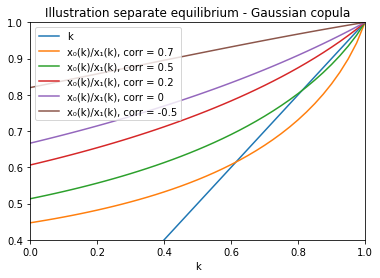

In [11]:
# Plot describing equilibria for different values of the correlation parameter and gaussian copula
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
d = np.arange(0, 1.01, 0.025)
fig, ax = plt.subplots( )

norm=1

vecfunc1 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc1(d), label='k')

a = 'x0(k)/x1(k),'.translate(subscript) + ' corr = 0.7'
kappa=0.7
vecfunc2 = np.vectorize(func_x)
ax.plot(d,vecfunc2(d),label=a)

a = 'x0(k)/x1(k),'.translate(subscript) + ' corr = 0.5'
kappa=0.5
vecfunc3 = np.vectorize(func_x)
ax.plot(d,vecfunc3(d),label=a)


a = 'x0(k)/x1(k),'.translate(subscript) + ' corr = 0.2'
kappa=0.2
vecfunc4 = np.vectorize(func_x)
ax.plot(d,vecfunc4(d),label=a)

a = 'x0(k)/x1(k),'.translate(subscript) + ' corr = 0'
kappa=0
vecfunc5 = np.vectorize(func_x)
ax.plot(d,vecfunc5(d),label=a)

a = 'x0(k)/x1(k),'.translate(subscript) + ' corr = -0.5'
kappa=-0.5
vecfunc6 = np.vectorize(func_x)
ax.plot(d,vecfunc6(d),label=a)

ax.set_ylim([0.4, 1])
ax.set_xlim([0, 1])
ax.set_title("Illustration separate equilibrium - Gaussian copula")  
ax.set_xlabel('k')
ax.legend(loc='upper left')
plt.savefig('gc.png')

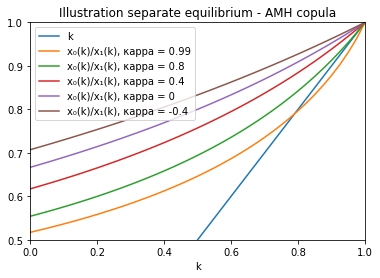

In [10]:
# Plot describing equilibria for different values of the correlation parameter and AMH copula
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
d = np.arange(0, 1.01, 0.025)
fig, ax = plt.subplots( )

norm=0

vecfunc1 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc1(d), label='k')

a = 'x0(k)/x1(k),'.translate(subscript) + ' κappa = 0.99'
kappa=0.99
vecfunc2 = np.vectorize(func_x)
ax.plot(d,vecfunc2(d),label=a)

a = 'x0(k)/x1(k),'.translate(subscript) + ' κappa = 0.8'
kappa=0.8
vecfunc3 = np.vectorize(func_x)
ax.plot(d,vecfunc3(d),label=a)


a = 'x0(k)/x1(k),'.translate(subscript) + ' κappa = 0.4'
kappa=0.4
vecfunc4 = np.vectorize(func_x)
ax.plot(d,vecfunc4(d),label=a)

a = 'x0(k)/x1(k),'.translate(subscript) + ' κappa = 0'
kappa=0
vecfunc5 = np.vectorize(func_x)
ax.plot(d,vecfunc5(d),label=a)

a = 'x0(k)/x1(k),'.translate(subscript) + ' κappa = -0.4'
kappa=-0.4
vecfunc6 = np.vectorize(func_x)
ax.plot(d,vecfunc6(d),label=a)

ax.set_ylim([0.5, 1])
ax.set_xlim([0, 1])
ax.set_title("Illustration separate equilibrium - AMH copula")  
ax.set_xlabel('k')
ax.legend(loc='upper left')
plt.savefig('amh.png')

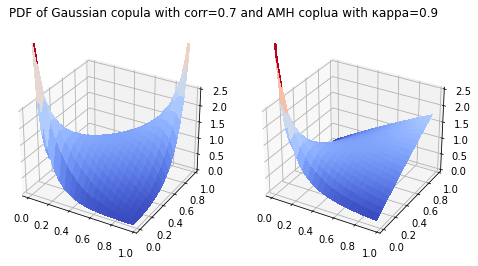

In [14]:
#3D plot of pdf of Gaussian and AMH copula
norm =1
kappa =0.7

fig = plt.figure(figsize=plt.figaspect(0.5))

#Create grid and multivariate normal
x = np.arange(0.01,0.99,0.05)
y = np.arange(0.01,0.99,0.05)
X, Y = np.meshgrid(x,y)

ax = fig.add_subplot(1, 2, 1, projection='3d')

zs = []
for i in np.arange(0.01,0.99,0.05):
    for j in np.arange(0.01,0.99,0.05):
        zs.append(acop(i,j,kappa))
zs = np.array(zs)
Z = zs.reshape(X.shape)

#Make a 3D plot


ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.set_zlim([0, 2.5])



norm =0
kappa =0.9

ax = fig.add_subplot(1, 2, 2, projection='3d')

#Create grid and multivariate normal
zs = np.array(acop(np.ravel(X), np.ravel(Y), kappa))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.set_zlim([0, 2.5])
plt.suptitle("PDF of Gaussian copula with corr=0.7 and AMH coplua with κappa=0.9") 

plt.savefig('pdf3d.png')


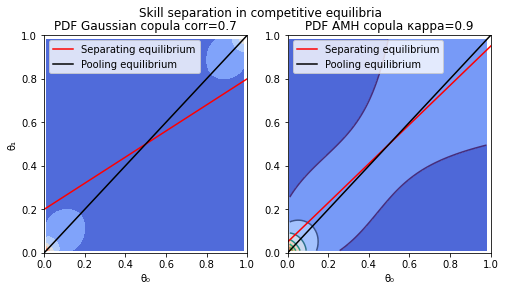

In [15]:
# Contour plot and equilibria distributions Gaussian and AMH copula

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

fig = plt.figure(figsize=plt.figaspect(0.5))
d = np.arange(0, 1, 0.001)
vecfunc = np.vectorize(lambda x: (x-(1-k)/2)/k)
vecfunc2 = np.vectorize(lambda x: x)
x = np.arange(0.01,0.99,0.01)
y = np.arange(0.01,0.99,0.01)
X, Y = np.meshgrid(x,y)

norm = 1
kappa = 0.7
k=0.6
m=det_m(k)

ax = fig.add_subplot(1, 2, 1)

ax.plot(vecfunc(d),d,label='Separating equilibrium',color='red')
ax.plot(d,vecfunc2(d), label='Pooling equilibrium',color='black')
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_title("PDF Gaussian copula corr=0.7")  
ax.set_xlabel('θ0'.translate(subscript))
ax.set_ylabel('θ1'.translate(subscript))
ax.legend()

zs = []
for i in np.arange(0.01,0.99,0.01):
    for j in np.arange(0.01,0.99,0.01):
        zs.append(acop(i,j,kappa))
zs = np.array(zs)
Z = zs.reshape(X.shape)
ax.contourf(X, Y, Z, cmap=cm.coolwarm)



norm = 0
kappa = 0.9
k=newton_krylov(lambda k: func_x(k)-k,  [0.5])
m=det_m(k)

ax = fig.add_subplot(1, 2, 2)

ax.plot(vecfunc(d),d,label='Separating equilibrium',color='red')
vecfunc2 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc2(d), label='Pooling equilibrium',color='black')
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_title("PDF AMH copula κappa=0.9")  
ax.set_xlabel('θ0'.translate(subscript))
ax.legend()
zs = np.array(acop(np.ravel(X), np.ravel(Y), kappa))
Z = zs.reshape(X.shape)
ax.contourf(X, Y, Z, cmap=cm.coolwarm)
plt.contour(X,Y,Z)

plt.suptitle("Skill separation in competitive equilibria") 
plt.savefig('eqsep.png')

In [29]:
# A set of helper functions
norm = 0
beta = 0.25
γ = 1

def sol(kap):
    global kappa
    kappa = kap
    return newton_krylov(lambda k: func_x(k)-k,  [0.5])[0]

def sol_gamma(gamma):
    global γ
    γ = gamma
    out = np.power(newton_krylov(lambda k: func_x(k)-k,  [0.5])[0],γ)
    return out

def prod(x):
    return 10 + (beta/2)*x*np.power(x,γ)-((1-beta)/2)*np.power(1-x,2)

def cond_prod(θ,z):
    return beta*θ*np.power(z,γ)

def func_mx(k,m):
    ans1, err1 = integrate.dblquad(lambda x,y: x*acop(x,y,kappa), 0 , 1, lambda x: m + x * k,  1)
    ans0, err0 = integrate.dblquad(lambda x,y: y*acop(x,y,kappa), 0,1 , 0, lambda x: m + x * k )
    return [2*ans0, 2*ans1]

def prod_tot_eq(kap):
    comp1 = lambda kap: func_mx(sol(kap),det_m(sol(kap)))
    comp2 = lambda kap: comp1(kap)
    return prod(comp2(kap)[0]) + prod(comp2(kap)[1])

def prod_tot_ifc(kap):
    global kappa
    kappa = kap
    ans1, err1 = integrate.dblquad(lambda x,y: x*acop(x,y,kappa), 0 , 1, lambda x: x ,  1)
    ans0, err0 = integrate.dblquad(lambda x,y: y*acop(x,y,kappa), 0,1 , 0, lambda x:  x )
    return prod(2*ans1) + prod(2*ans0)

def wage_dist(wage_level,x_0,x_1):
    θ_0_w  = newton_krylov(lambda θ: wage_level - cond_prod(θ,x_0),  [0.5])[0]
    θ_1_w  = newton_krylov(lambda θ: wage_level - cond_prod(θ,x_1),  [0.5])[0]
    ans0, err0 = integrate.quad(lambda x: acop(x, θ_0_w, kappa), 0, θ_1_w )
    ans1, err0 = integrate.quad(lambda x: acop(θ_1_w, x, kappa), 0, θ_0_w )
    return ans0 + ans1 - ((1-beta)/2)*np.power(1-x_0,2) - ((1-beta)/2)*np.power(1-x_1,2)

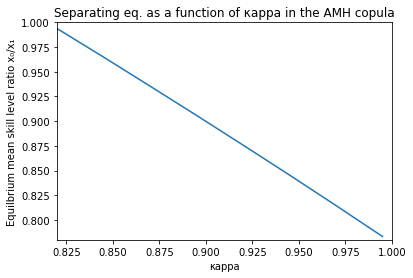

In [22]:
# Look at plot title
norm = 0
d = np.arange(0.82, 1, 0.025)
fig, ax = plt.subplots()
vecfunc = np.vectorize(sol)
ax.plot(d,vecfunc(d))
ax.set_ylim([0.78, 1])
ax.set_xlim([0.82, 1])
ax.set_title("Separating eq. as a function of κappa in the AMH copula")
ax.set_xlabel('κappa')
ax.set_ylabel('Equilbrium mean skill level ratio x0/x1'.translate(subscript))
plt.savefig('amheq.png')

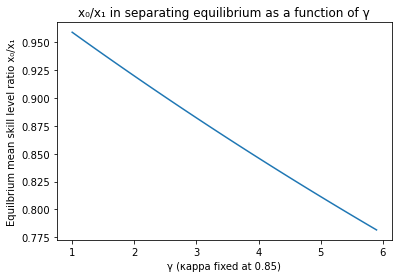

In [48]:
# Separating equilibrium as a function of degree of supermodularity
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
norm = 0
kappa = 0.85
d = np.arange(1, 6, 0.1)
fig, ax = plt.subplots()
vecfunc = np.vectorize(sol_gamma)
ax.plot(d,vecfunc(d))
#ax.set_ylim([0.78, 1])
#ax.set_xlim([0.82, 1])
ax.set_title("x0/x1 in separating equilibrium as a function of γ".translate(subscript))
ax.set_xlabel('γ (κappa fixed at 0.85)')
ax.set_ylabel('Equilbrium mean skill level ratio x0/x1'.translate(subscript))
plt.savefig('gammacs.png')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


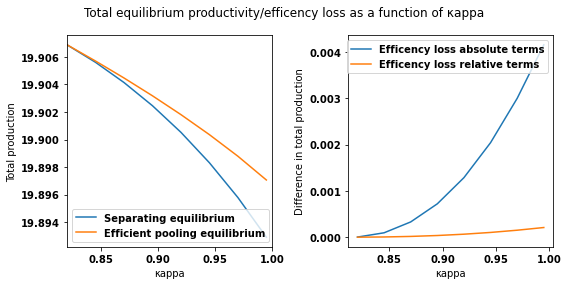

In [53]:
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

plt.rc('font', **font)
d = np.arange(0.82, 1, 0.025)
norm = 0
vecfunc = np.vectorize(prod_tot_eq)
fig, ax = plt.subplots(1,2)
fig.suptitle("Total equilibrium productivity/efficency loss as a function of κappa")
fig.set_size_inches(8, 4)

ax[0].plot(d,vecfunc(d), label='Separating equilibrium')
vecfunc1 = np.vectorize(prod_tot_ifc)
ax[0].plot(d,vecfunc1(d), label = 'Efficient pooling equilibrium')
ax[0].set_xlim([0.82, 1])

ax[0].set_xlabel('κappa')
ax[0].set_ylabel('Total production'.translate(subscript))
ax[0].legend()

vecfunc2 = np.vectorize(lambda kap: prod_tot_ifc(kap) - prod_tot_eq(kap))
ax[1].plot(d,vecfunc2(d), label='Efficency loss absolute terms')
vecfunc3 = np.vectorize(lambda kap: (prod_tot_ifc(kap) - prod_tot_eq(kap))/prod_tot_ifc(kap))
ax[1].plot(d,vecfunc3(d), label = 'Efficency loss relative terms')
ax[1].set_xlabel('κappa')
ax[1].set_ylabel('Difference in total production'.translate(subscript))
ax[1].legend()
fig.tight_layout()
plt.savefig('eff2.png')

0.5393561504848507 0.6830153549043789
0.6147968765426006 0.6147968765422903
0.5893523590962614 0.6548842663050359
0.6229382636750423 0.6229382636750418


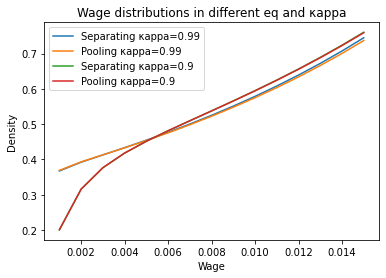

In [85]:
#3D plot of pdf of Gaussian and AMH copula
norm = 0
γ=1
beta = 0.05
x = np.arange(0.001,(beta/2)*np.power(x_0,γ),0.001)
fig, ax = plt.subplots()


kappa = 0.99
k = sol(kappa)
x_0,x_1 = func_mx(k,det_m(k))
print(x_0,x_1)
vf1 = np.vectorize(lambda w: wage_dist(w,x_0,x_1))
ax.plot(x,vf1(x), label='Separating κappa=0.99')

x_0,x_1 = func_mx(1,0)
print(x_0,x_1)
vf2 = np.vectorize(lambda w: wage_dist(w,x_0,x_1))
ax.plot(x,vf2(x), label='Pooling κappa=0.99')



kappa = 0.9
k = sol(kappa)
x_0,x_1 = func_mx(k,det_m(k))
print(x_0,x_1)
vf1 = np.vectorize(lambda w: wage_dist(w,x_0,x_1))
ax.plot(x,vf1(x), label='Separating κappa=0.9')

x_0,x_1 = func_mx(1,0)
print(x_0,x_1)
vf2 = np.vectorize(lambda w: wage_dist(w,x_0,x_1))
ax.plot(x,vf2(x), label='Pooling κappa=0.9')



plt.legend()
plt.title('Wage distributions in different eq and κappa')
plt.xlabel('Wage')
plt.ylabel('Density')
plt.savefig('wagedist.png')

0.8784394821364879

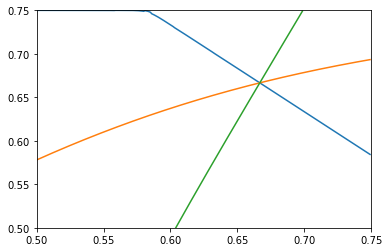

In [142]:
# Production in one sector as a function of production in the other. A PPF graph!
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

norm = 0
γ = 2.5
beta = 0.25

def prod(x,z):
    return (beta/2)*x*np.power(z,γ)-((1-beta)/2)*np.power(1-z,2)

func_x0 = lambda k: 1/2 + 1/(6*np.power(k,γ))
func_x1 = lambda k: 3/4-np.power(k,2*γ)/12

def tot_prod(x,level,k):
    z_0 = func_x0(k)
    z_1 = func_x1(k)
    y = least_squares(lambda y: prod(x,z_0) + prod(y, z_1 ) - level,  (0.6), bounds=(0.5,0.75))
    return y.x[0]


def implicit_f(x,which,g):
    if which == 0:
        func = func_x0
    else:
        func = func_x1
    out = least_squares(lambda y: y-func(y/x),  [g], bounds=[0.5,0.75])
    return out.x[0]

level = prod(2/3,2/3) + prod(2/3,2/3)
fig, ax = plt.subplots()

d = np.arange(0.5, 0.75, 0.001)
vecfunc1 = np.vectorize(lambda x: tot_prod(x,level,1))
vecfunc2 = np.vectorize(lambda x: implicit_f(x,1,0.75))
vecfunc3 = np.vectorize(lambda x: implicit_f(x,0,0.5))
ax.plot(d,vecfunc1(d))
ax.plot(d,vecfunc2(d))
ax.plot(vecfunc3(d),d)
ax.set_ylim([0.5, 0.75])
ax.set_xlim([0.5, 0.75])
# ax.set_title("Graph showing stuff")
# ax.set_xlabel('x0'.translate(subscript))
# ax.set_ylabel('x1'.translate(subscript))
# plt.savefig('ppw.png')

k = least_squares(lambda k: k-func_x0(1/k)/func_x1(k),  [0.6], bounds=[0.5,1]).x[0]
np.power(k,1/γ)

k

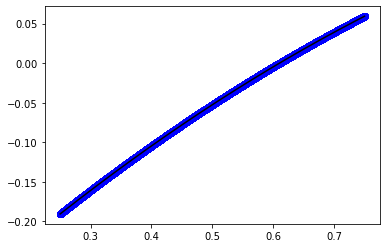

0.5


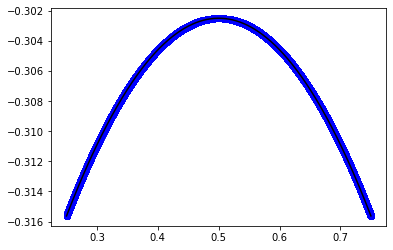

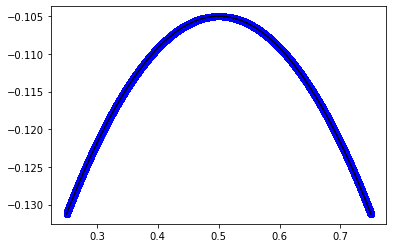

2.13953125
2.65578125


In [2]:
# Equilibrium inexistance calculations
b=0.29
def f(d):
    return (b/2)*d**2-(1-b)/2*(1-d)**2
vecfunc = np.vectorize(f)

d = np.arange(1/4, 3/4, 0.00001)
T = vecfunc(d)
plt.plot (d, T, 'bo', d, T, 'k')
plt.show()

solution = minimize_scalar(lambda d: -(f(d)+f(1-d)), bounds=[1/4,3/4], method='bounded')
print(solution.x)
def g(x,y,z):
    if y < 1/2:
        return z*x
    elif x < 1/2 and y > 1/2:
        return (y*(1-z)+(1-y)*z)*x 
    else:
        return (y*z+(1-y)*(1-z))*x-(1-2*y)*(1-2*z)/2

def h(d):
    return g(d,b,solution.x)

vecfunc2 = np.vectorize(h)
TT =vecfunc(d)-vecfunc2(d)
plt.plot (d, TT, 'bo', d, TT, 'k')
plt.show()


TTT = vecfunc(d)+vecfunc(1-d)
plt.plot (d, TTT, 'bo', d, TTT, 'k')
plt.show()

def i(x0,x1,y0,y1):
        return 5*(y0+y1)+b*(x0*y0+x1*y1)*(x0+x1)*(y0+y1)--(3-2*b)/2*x0*y0-(1+2*b)/2*x1*y1+(2*b-1)/2*y1
    

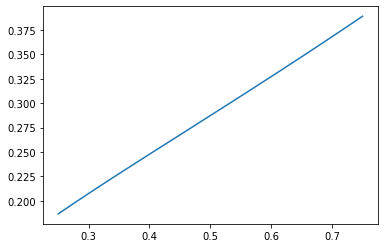

0.727640845350405
0.4191003888744793
0.41910039432658897
0.22711621994828485
0.13895065794279124


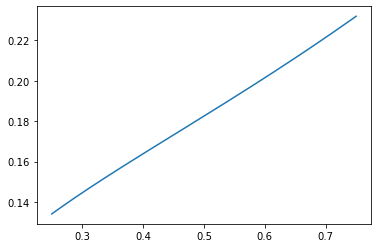

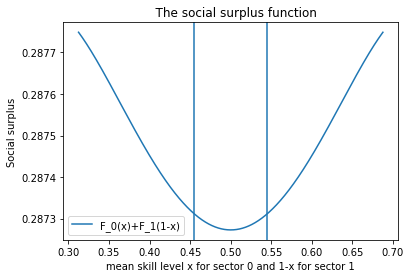

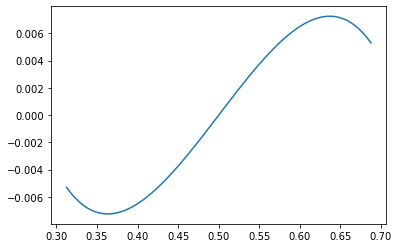

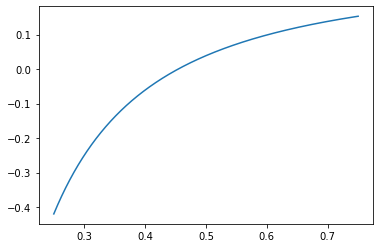

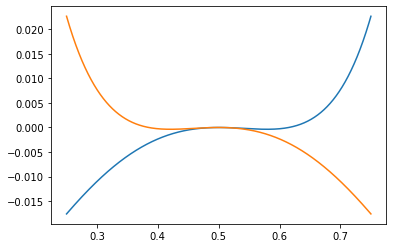

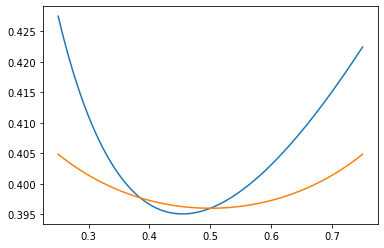

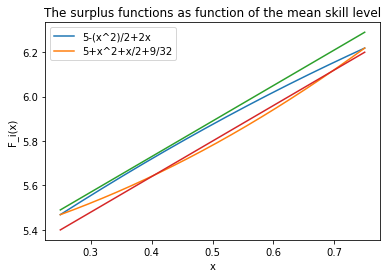

<Figure size 432x288 with 0 Axes>

In [3]:
# More equilibrium inexistance calculations
b=0.29
def f(d):
    return (b/2)*d**2+(1-b)/2*math.sqrt(d)
vecfunc = np.vectorize(f)

d = np.arange(1/4, 3/4, 0.00001)
T = vecfunc(d)
plt.plot (d, T)
plt.show()
plt.clf()

solution = minimize_scalar(lambda d: -(f(d)+f(1-d)), bounds=[1/4,3/4], method='bounded')
print(solution.x)
def g(x):
    return b*x+(1-b)/(4*math.sqrt(x))
print(g(solution.x))
print(g(1-solution.x))
print(f(solution.x)-g(solution.x)*solution.x/2)
print(f(1-solution.x)-g(solution.x)*(1-solution.x)/2)
d = np.arange(1/4, 3/4, 0.00001)
TT = vecfunc(d)-g(solution.x)*d/2
plt.plot (d, TT)
plt.show()
plt.clf()

d = np.arange(5/16, 11/16, 0.00001)
T = vecfunc(d)/2+vecfunc(1-d)/2
plt.plot (d, T, label='F_0(x)+F_1(1-x)')
plt.axvline(x=0.455)
plt.axvline(x=0.545)
plt.xlabel('mean skill level x for sector 0 and 1-x for sector 1')
plt.ylabel('Social surplus')
plt.title('    The social surplus function ')
plt.legend()
plt.show()
plt.clf()

def i(d):
    return g(d)-g(1-d)
vecfunc = np.vectorize(i)

TTT = vecfunc(d)
plt.plot (d, TTT)
plt.show()
plt.clf()

def j(d):
    return b-(1-b)/(8*d**1.5)
vecfunc = np.vectorize(j)

d = np.arange(1/4, 3/4, 0.00001)
T = vecfunc(d)
plt.plot (d, T)
plt.show()
plt.clf()
def fer(a):
    return -(1-2*a)*g(1-a)*2+b*(1-a)**2+(1-b)*math.sqrt(1-a)-b*a**2-(1-b)*math.sqrt(a)
def ferr(a):
    return (1-2*a)*g(a)*2-b*(1-a)**2-(1-b)*math.sqrt(1-a)+b*a**2+(1-b)*math.sqrt(a)
d = np.arange(1/4, 3/4, 0.00001)
vecfunc = np.vectorize(fer)
T = vecfunc(d)
vecfunc = np.vectorize(ferr)
TT = vecfunc(d)
plt.plot (d, T)
plt.plot (d, TT)
plt.show()
plt.clf()

x_1=0.3


def f2(x):
    return ((b/2)*(x**2-(1-x)**2)+((1-b)/2)*(math.sqrt(x)-math.sqrt((1-x))))/(2*x-1)


solution2 = minimize_scalar(lambda d: (g(d)-f2(d))**2, bounds=[1/4,5/11], method='bounded')


d = np.arange(1/4, 3/4, 0.00001)
vecfunc = np.vectorize(g)
T = vecfunc(d)
vecfunc = np.vectorize(f2)
TT = vecfunc(d)
plt.plot (d, T)
plt.plot (d, TT)
plt.show()
plt.clf()


def f3(x):
    return -x**2/2+2*x+5
def f4(x):
    return x**2+x/2+5+9/32
def f5(x):
    return 5.09+1.6*x
def f6(x):
    return 5+1.6*x



d = np.arange(1/4, 3/4, 0.00001)
vecfunc = np.vectorize(f3)
T = vecfunc(d)
vecfunc = np.vectorize(f4)
TT = vecfunc(d)
vecfunc = np.vectorize(f5)
TTT = vecfunc(d)
vecfunc = np.vectorize(f6)
TTTT = vecfunc(d)
plt.plot (d, T, label='5-(x^2)/2+2x')
plt.plot (d, TT, label='5+x^2+x/2+9/32')
plt.plot(d,TTT)
plt.plot(d,TTTT)
plt.xlabel('x')
plt.ylabel('F_i(x)')
plt.title('The surplus functions as function of the mean skill level')
plt.legend()
plt.show()
plt.clf()